# 1. Preprocessing the dataset
 

In [125]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For classification and clustering
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix


In [126]:
from sklearn.datasets import load_wine

data = load_wine()
# Splitting data into attribute columns and target column
df_data = pd.DataFrame(data.data, columns=data.feature_names)
df_target = pd.DataFrame(data = data.target)

# Merging the datasets into one dataframe
all_data = df_data.merge(df_target, left_index=True, right_index=True)
all_data.rename(columns={0 :'target_class'}, inplace=True )
all_data.info()
# all_data['target_class']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

## 1a. Data exploration

In [127]:
# Missing values, type of data, shape of data
all_data.info()

# Dataset statistics
all_data.describe()

# Length of columns
len(all_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

14

The dataset does not require cleaning, as there are no missing values. 
If there would be missing values, we would impute them with the mean values of the corresponding attribute.

## Data Visualisation

<AxesSubplot:xlabel='proline', ylabel='proanthocyanins'>

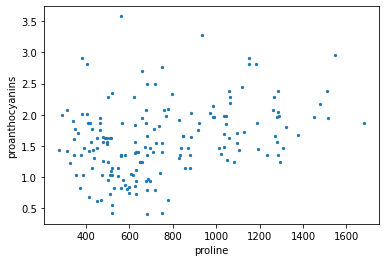

In [128]:
# Plotting with Pandas
all_data.plot.scatter(x='proline', y='proanthocyanins', s=5)


In [19]:
# plt.plot(all_data['target_class'])

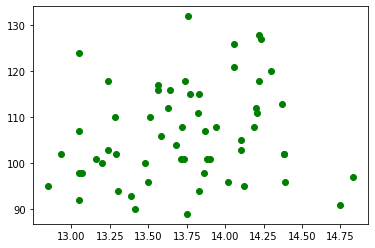

In [129]:
# Plotting with Matplotlib

# Selecting the instances of each target class
all_data_class0 = all_data[all_data['target_class'] == 0] 
all_data_class1 = all_data[all_data['target_class'] == 1] 
all_data_class2 = all_data[all_data['target_class'] == 2] 


plt.plot(all_data_class0['alcohol'], all_data_class0['magnesium'], 'go')
# plt.plot(all_data_class1['magnesium'], all_data_class1['alcohol'], 'ro', c='blue');
# plt.plot(all_data_class2['alcohol'], all_data_class2['proline'], 'ro', c='green');

In [135]:
#Plotting with Seaborn
X = all_data[['alcohol','ash', 'malic_acid', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'target_class']]

sns_plot = sns.pairplot(X, hue="target_class", palette=sns.color_palette("tab10")[:3])
sns_plot.fig.suptitle('Pairwise Relationships Wine Dataset', y=1.008, size=30)

plt.savefig('pairplot_wine_dataset.png')

## 2. Applying the Classification Algorithm (Random Forest)

In [110]:
all_data.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target_class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [111]:
features = all_data.iloc[: , :13]
target = all_data['target_class']

In [112]:
# Dividing X and y into train and test data (small train data to gain more errors)
# X_train, X_test, y_train, y_test = train_test_split(df_data, df_target, train_size=0.6, test_size=0.4)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4) # should give 71 instances
# print(X_train.index)

# Training a RandomForest Classifier 
model = RandomForestClassifier()
model.fit(X_train, y_train.values.ravel())

# Obtaining predictions
y_hat = model.predict(X_test)


In [121]:
# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted_class'] = y_hat.tolist()
predictions_col = predictions_col.set_index(X_test.index)
predictions_col['true_class'] = y_test
print(len(y_test))

# Calculating the errors with the absolute value
predictions_col['errors'] = abs(predictions_col['predicted_class'] - predictions_col['true_class'])
print(predictions_col.isnull().sum())


# Rescaling the prediction errors with max error value of 1
# It doesn't matter whether the misclassification is between class 0 and 2 or between 0 and 1, it has the same error value. 
predictions_col['errors'] = predictions_col['errors'].replace(2.0, 1.0)
# print(len(predictions_col['errors'] ))

# Adding predictions to test data
print(predictions_col.isnull().sum())
entire_dataset = X_test.merge(predictions_col, how='outer', left_index = True, right_index = True)



errors = entire_dataset['errors']
df_out = entire_dataset.drop(['predicted_class', 'true_class', 'errors'], axis=1)

# The dataset
# print(len(entire_dataset))
entire_dataset

72
predicted_class    0
true_class         0
errors             0
dtype: int64
predicted_class    0
true_class         0
errors             0
dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,predicted_class,true_class,errors
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1,1,0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1,1,0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2,2,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,0,0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,12.86,1.35,2.32,18.0,122.0,1.51,1.25,0.21,0.94,4.10,0.76,1.29,630.0,2,2,0
112,11.76,2.68,2.92,20.0,103.0,1.75,2.03,0.60,1.05,3.80,1.23,2.50,607.0,1,1,0
163,12.96,3.45,2.35,18.5,106.0,1.39,0.70,0.40,0.94,5.28,0.68,1.75,675.0,2,2,0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0,0,0


In [ ]:
import os
path = r'..\\Preprocessed_datasets\\'
# df.to_csv(os.path.join(path, r'theoretical_data.csv'))

entire_dataset.to_csv(os.path.join(path, r'preprocessed_wine_final.csv'))

In [122]:
len(X_test)


72

In [124]:
entire_dataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,predicted_class,true_class,errors
111,12.52,2.43,2.17,21.0,88.0,2.55,2.27,0.26,1.22,2.00,0.90,2.78,325.0,1,1,0
68,13.34,0.94,2.36,17.0,110.0,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750.0,1,1,0
145,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2,2,0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0,0,0,0
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1,1,0


# 3. Clustering 
Sources:

- https://www.youtube.com/watch?v=ZueoXMgCd1c&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v&index=35&ab_channel=sentdex
- https://towardsdatascience.com/clustering-with-k-means-1e07a8bfb7ca
- https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/?# 

## K-Means Clustering
K is the hyperparameter that defines how many clusters there will be formed in the cluster space. When you take K=2, then the data will be grouped into two clusters. 
When we have k=2, we have two centroids. We calculate the distance between the datapoints and the centroids. We assign each datapoint to the centroid that is closest. 
The centroids are randomly chosen and we classify the datapoints as being part of either cluster 1 or cluster 2. 
Then, we calculate the mean of all datapoints in cluster 1 and cluster 2 and we define the new centroid. 
Once the centroids are not moving anymore, we have the final centroids.
We also have a tolerance and a max_iteration parameter. 

Downside K-means: 
* It clusters the data in groups of roughly the same size. So you can't have three clusters in different sizes.
* Scaling 

Clustering is mostly used to find a certain pattern in the data rather than accuracy or visualisation purposes. 


In [26]:
# Importing clustering-relevant libraries
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances

In [27]:
df_out.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,13.157368,1.843860,2.366842,18.108772,100.052632,2.597719,2.568772,0.320175,1.800877,4.506316,1.094561,2.969298,867.929825
std,0.869235,0.716277,0.307589,3.063744,13.360952,0.533643,0.719901,0.095497,0.528814,1.582518,0.137815,0.478076,362.981250
min,11.620000,0.890000,1.360000,10.600000,70.000000,1.380000,0.570000,0.130000,0.420000,1.740000,0.790000,1.590000,290.000000
25%,12.330000,1.500000,2.220000,16.400000,90.000000,2.200000,2.170000,0.260000,1.480000,3.250000,1.020000,2.740000,510.000000
50%,13.280000,1.730000,2.400000,18.000000,100.000000,2.630000,2.650000,0.300000,1.770000,4.500000,1.070000,3.000000,880.000000
75%,13.870000,1.920000,2.580000,19.400000,108.000000,2.980000,3.060000,0.370000,2.030000,5.650000,1.190000,3.210000,1130.000000
max,14.750000,4.040000,3.220000,26.000000,136.000000,3.850000,3.930000,0.580000,2.960000,8.700000,1.450000,3.920000,1680.000000


In [28]:
# Checking whether the SciKit KMeans is applicable on the PD Dataframe
# source: https://stackoverflow.com/questions/28017091/will-pandas-dataframe-object-work-with-sklearn-kmeans-clustering 

# Scaling df_out and df_matrix
to_scale = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
df_out[to_scale] = StandardScaler().fit_transform(scaled_test[to_scale])
# This is what the data structure looks like
df_matrix = df_out
df_matrix.head()

NameError: name 'scaled_test' is not defined

In [26]:
df_out.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
12,0.687846,-0.160373,0.141557,-0.694417,-0.834587,0.004312,0.267992,-0.318793,0.017405,0.697247,0.405843,-0.146241,1.256507
23,-0.356751,-0.343481,0.502356,-0.101678,-0.381526,-0.222556,-0.278564,-0.635733,-0.650337,-0.367414,-0.033392,1.394286,0.408775
25,-0.124619,0.290352,2.798346,2.269277,1.808272,0.061029,0.155878,1.582845,0.227267,-0.590546,0.259431,0.486852,-0.105424
35,0.374467,-0.047692,0.141557,0.787430,-0.003974,0.193369,0.576306,-0.635733,0.112797,0.378486,-0.399421,1.056636,0.144727
13,1.848509,-0.160373,0.075958,-2.209194,-0.683567,0.949596,1.571320,1.160258,1.925240,0.569743,1.137900,-0.504994,0.784001


### Question:
If we rescale all the features, will the error attribute then still have a noticeable effect on how fast we find the clusters with highest bias?

potential helpful source:
https://datascience.stackexchange.com/questions/6715/is-it-necessary-to-standardize-your-data-before-clustering

In [34]:
# test with standardscaler on PD dataframe
scaled_test = df_out
# print(scaled_test['hue'])

to_scale = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
scaled_test[to_scale] = StandardScaler().fit_transform(scaled_test[to_scale])
df_matrix = scaled_matrix
# df_matrix


NameError: name 'scaled_matrix' is not defined

In [33]:
# Scaling the dataset

# checking the difference in the avg euclidean distance metrics when applying/ 
print('average euclidean distance of non-scaled features:', np.mean(euclidean_distances(df_matrix))) # 
print('average euclidean distance of scaled features:', np.mean(euclidean_distances(StandardScaler().fit_transform(df_matrix))))

# proceeding with scaled features
scaled_matrix = StandardScaler().fit_transform(df_matrix)
scaled_matrix[:4]

# if we don't normalize the data --> proceed with df_matrix instead

NameError: name 'df_matrix' is not defined

### Question: Scaling the features results in weird values for the error columns.. How can I check whether they still make sense?

--> I could maybe use the MinMaxScaler instead of the StandardScaler?

_"An alternative standardization is scaling features to lie between a given minimum and maximum value, often between zero and one, or so that the maximum absolute value of each feature is scaled to unit size. This can be achieved using MinMaxScaler or MaxAbsScaler, respectively.
The motivation to use this scaling include robustness to very small standard deviations of features and preserving zero entries in sparse data._

 _"You use MinMaxScaler when you do not assume that the shape of all your features follows a normal distribution."_

source: https://scikit-learn.org/stable/modules/preprocessing.html


In [29]:
# Applying K-Means for initial overview on the clusters
# Fitting the model with the K-Means++ initialization, which has a faster convergence 
kmeans = KMeans(init="k-means++", n_clusters=2)
clus_model = kmeans.fit(scaled_matrix)
print('Cluster summary: ')
print('The lowest found SSE value for k=2: ', clus_model.inertia_)
print('The locations of the centroids are: ', clus_model.cluster_centers_)
print('The number of iterations required to converge:', clus_model.n_iter_)
print('The cluster assignments: ', clus_model.labels_)


Cluster summary: 
The lowest found SSE value for k=2:  532.9451730487428
The locations of the centroids are:  [[-1.01611827 -0.12147145 -0.54411593  0.17744202 -0.48220592 -0.89956001
  -0.95391909  0.58674866 -0.4459265  -0.92903967  0.31172087 -0.64266643
  -1.00715787]
 [ 0.59273566  0.07085834  0.31740096 -0.10350784  0.28128679  0.52474334
   0.5564528  -0.34227005  0.26012379  0.5419398  -0.18183717  0.37488875
   0.58750876]]
The number of iterations required to converge: 4
The cluster assignments:  [1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0]


## Evaluating the Clustering performance
## Choosing the right numbers of clusters
### The Elbow Method
With this method, we plot the SSE as a function of the number of clusters.
With the elbow elbow method and the silhouette coefficient, we can evaluate the clustering performance without ground truth labels. 

### todo: check out https://pypi.org/project/yellowbrick/ and implement some of the clustering visualizations

In [31]:
# Making a dictionary of the K-means arguments
clus_model_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}

# A list holding the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **clus_model_kwargs)
    kmeans.fit(scaled_matrix)
    sse.append(kmeans.inertia_)

We can now plot the Elbow point, which is the location in the plot where the SSE bends down slightly. This point indicates a trade-off between the errors and the number of clusters. In the plot below, we can observe that the elbow point is located at [k=2, SSE=450]

In [30]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

To confirm our observation, we can calculate the Elbow point programmatically with kneed.

In [12]:
import kneed
from kneed import knee_locator

kl = kneed.KneeLocator(range(1, 11), sse, curve="convex", direction ="decreasing")
kl.elbow

NameError: name 'sse' is not defined

### Question: Here, the elbow point is 4 instead of 2. How to decide which one to pick? 

TODO: find out the curve of the dataset 


## The Silhouette Coefficient

This method quantifies how well a data points fits into its assigned cluster based on the following two factors:
* _The mean intra-cluster distance_ --> _a_
* _The mean nearest-cluster distance_ --> _b_

We calculate the silhouette coefficient for each instance in the dataset as follows:

                            (b-a)/max(a, b)



In [303]:
# A list holding the silhouette coefficients for each k
silhouette_coefficients = []

# Starting with 2 cluster (which is the minimum)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **clus_model_kwargs)
    kmeans.fit(scaled_matrix)
    score = silhouette_score(scaled_matrix, kmeans.labels_)
    silhouette_coefficients.append(score)

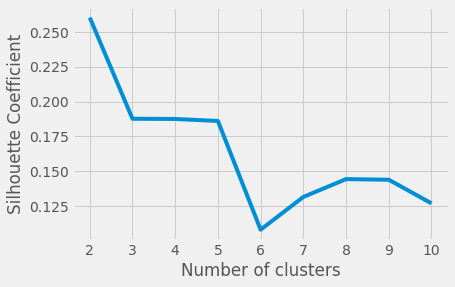

In [304]:
# Plotting the avg silhouette score for each k 
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Following from this, we can best proceed with k = 2. The higher the silhouette coefficient is, the more likely it is that an instance is accurately assigned to its cluster. 


## 4. The Bias-Aware Hierarchical Clustering Algorithm

In this stage, we use the K-Means and Hierarchical clustering techniques to:
1. Iteratively split one cluster into two clusters, 
2. Calculate the F-score for each cluster
3. Calculate the Bias for each cluster, which is defined as below
- Bias Metric: 
$ B_{b} = PerformanceMetric(Cluster_X) - PerformanceMetric(allOtherClusters/Cluster_X)$ 

Where:
- PerformanceMetric = F1-score 


In [32]:
scaled_matrix[:4]

NameError: name 'scaled_matrix' is not defined

## Performance Measure: F-Score

The functions below calculate the errors of the RandomForestClassifiers, as they will be later used in the Bias-Aware Hierarchical Clustering Algorithm. 

We use the F-Score as evaluation metric for the classification algorithm. The F-score is the harmonic mean of precision and recall, and it can be calculated as follows:
- Precision: TP / (TP + FP) 
- Recall: TP / (TP + FN)

F-Score: 2 * ((Precision x Recall) / (Precision + Recall))

TODO: use the weighted F1-score instead of the macro F1-score. 

In [32]:
# is used to calculate the F-score of the instances in the clusters.
# the lower the f score is, the worse the performance is 

# requires the entire_dataset dataframe (with predicted and true class, but the errors col is not needed)
def F_score(results, class_number):
    true_pos = results.loc[results["true_class"] == class_number][results["predicted_class"] == class_number]
    true_neg = results.loc[results["true_class"] != class_number][results["predicted_class"] != class_number]
    false_pos = results.loc[results["true_class"] != class_number][results["predicted_class"] == class_number]
    false_neg = results.loc[results["true_class"] == class_number][results["predicted_class"] != class_number]
    
    try:
        precision =  len(true_pos)/(len(true_pos) + len(false_pos))
    except ZeroDivisionError:
        return 0
    try:
        recall = len(true_pos)/(len(true_pos) + len(false_neg))
    except ZeroDivisionError:
        return 0

    f_score = 2 * ((precision * recall)/(precision + recall))

    return f_score

# Calculating the macro average F-score
def mean_f_score(results):
    classes = results['true_class'].unique()
    class_list = []
    for i in classes:
        class_i = F_score(results, i)
        class_list.append(class_i)
   
    mean_f_score = (sum(class_list))/len(classes)
    
    print('this is the mean F-score of all classes within this cluster in the list: ', mean_f_score)
    return(mean_f_score)

# Calculating the bias for each cluster
def calculate_bias(clustered_data, cluster_number):
    cluster_x = clustered_data.loc[clustered_data["clusters"] == cluster_number]
    remaining_clusters = clustered_data.loc[clustered_data["clusters"] != cluster_number]
    
    # Bias definition: 
    return mean_f_score(remaining_clusters) - mean_f_score(cluster_x)


### Test cells for calculating F-score and bias

In [33]:
# Adding assigned_cluster
random_cluster_val = pd.Series(np.random.randint(0, 3, size=500))
assigned_clus = pd.DataFrame(random_cluster_val, columns=['clusters'])

# test data for F-score and calculate_bias
testdataset = entire_dataset.join(assigned_clus, how='left')

testdataset.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,predicted_class,true_class,errors,clusters
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0,0,0.0,0.0,0
23,12.85,1.60,2.52,17.8,95.0,2.48,2.37,0.26,1.46,3.93,1.09,3.63,1015.0,1,0.0,1.0,2
25,13.05,2.05,3.22,25.0,124.0,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830.0,0,0.0,0.0,0
35,13.48,1.81,2.41,20.5,100.0,2.70,2.98,0.26,1.86,5.10,1.04,3.47,920.0,1,0.0,1.0,1
13,14.75,1.73,2.39,11.4,91.0,3.10,3.69,0.43,2.81,5.40,1.25,2.73,1150.0,2,0.0,1.0,1


In [34]:
testdataset['ash', 'hue']

KeyError: ('ash', 'hue')

In [35]:
F_score(testdataset, 1)

<ipython-input-32-08b3b47e7b7a>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_pos = results.loc[results["true_class"] == class_number][results["predicted_class"] == class_number]
<ipython-input-32-08b3b47e7b7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_neg = results.loc[results["true_class"] != class_number][results["predicted_class"] != class_number]
<ipython-input-32-08b3b47e7b7a>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_pos = results.loc[results["true_class"] != class_number][results["predicted_class"] == class_number]
<ipython-input-32-08b3b47e7b7a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_neg = results.loc[results["true_class"] == class_number][results["predicted_class"] != class_number]


0.39024390243902435

In [36]:
calculate_bias(testdataset, 2)

this is the mean F-score of all classes within this cluster in the list:  0.4256465517241379
this is the mean F-score of all classes within this cluster in the list:  0.5476190476190477
<ipython-input-32-08b3b47e7b7a>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_pos = results.loc[results["true_class"] == class_number][results["predicted_class"] == class_number]
<ipython-input-32-08b3b47e7b7a>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  true_neg = results.loc[results["true_class"] != class_number][results["predicted_class"] != class_number]
<ipython-input-32-08b3b47e7b7a>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_pos = results.loc[results["true_class"] != class_number][results["predicted_class"] == class_number]
<ipython-input-32-08b3b47e7b7a>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  false_neg = results.loc[results["true_class

-0.12197249589490977

In [311]:
calculate_variance(testdataset)

0.2406894429055095

In [312]:
get_highest_var_cluster(testdataset)

this is i: 0
variance cluster: 0.17283950617283952
highest variance: 0
this is the cluster number: 0
this is i: 1
variance cluster: 0.24826388888888892
highest variance: 0.17283950617283952
this is the cluster number: 1
this is i: 2
variance cluster: 0.24000000000000005
highest variance: 0.24826388888888892


1

In [37]:
clus_model_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [38]:
kmeans_algo = KMeans(n_clusters=2, **clus_model_kwargs).fit(scaled_matrix)
test_data = kmeans_algo.predict(scaled_matrix)
test_data

# scaled_matrix

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1])

In [39]:
# calculates the variances of the errors column
def calculate_variance(data):
    # Receives the data within one cluster to calculate the variance

    # Obtain errors column
    errors_col = data['errors']
    # Number of observations
    n = len(data)
    # Mean of the data
    mean = sum(errors_col)/n
    # Squared deviation 
    deviations = [(x - mean) ** 2 for x in errors_col]
    # Variance
    variance = sum(deviations) / n
    return variance

def get_highest_var_cluster(data):
    clusters = data['clusters'].unique()
    highest_variance = 0
    best_cluster = None
    cluster_number = None
    for i in clusters:
        print('this is i:', i)
        cluster_i = data[data['clusters'] == i]
        variance_cluster = calculate_variance(cluster_i)
        print('variance cluster:', variance_cluster)
        print('highest variance:', highest_variance)

        if variance_cluster > highest_variance:
            highest_variance = variance_cluster
            best_cluster = cluster_i
            cluster_number = i
            print('this is the cluster number:', cluster_number)

    return cluster_number


In [31]:
# Initialisation of main_data
main_data = pd.DataFrame(scaled_matrix)
main_data['clusters'] = 1
# main_data

NameError: name 'scaled_matrix' is not defined

In [29]:
MAX_ITER = 10 # --> in each iteration we split on the cluster with the highest variance
x = 1 # the cluster number on which we want to split
bias_prev_iteration_cluster = 0

for i in range(1, MAX_ITER):
    print('Value for x:', x)
    # select the instances with cluster number x as dataset
    high_bias_cluster = main_data.loc[main_data['clusters'] == x]
    print('this is the high bias cluster', high_bias_cluster)

    high_bias_cluster.drop('clusters', axis=1)

    # Apply Kmeans on this dataset
    kmeans_algo = KMeans(n_clusters=2, **clus_model_kwargs).fit(high_bias_cluster) #another experiment is to divide into 3 clusters

    # Fit the KMeans on the same dataset
    predictions = pd.DataFrame(kmeans_algo.predict(high_bias_cluster), columns=['new_clusters']) # Adding the assigned cluster to the column
    print()
    print('amount of rows with Nan:', len(clustered_data.isna()))
    # print(clustered_data)
    
    # add the new cluster assignments to the dataset
    new_main_data = main_data.join(clustered_data['new_clusters'], how='left')

    # the new cluster assignments should replace the old cluster values
    new_main_data['clusters'] = new_main_data['new_clusters'].combine_first(new_main_data['clusters'])
    new_main_data.drop('new_clusters', axis=1)

    # Calculating bias per cluster
    # For the bias we need the predicted and true class
    new_main_data = new_main_data.join(entire_dataset[['true_class', 'predicted_class']], how = 'left')

    # calculate bias for each of the two clusters
    negative_bias_0 = calculate_bias(new_main_data, 0)
    negative_bias_1 = calculate_bias(new_main_data, 1)

    new_main_data.drop(['true_class', 'predicted_class'], axis=1)

    if max(negative_bias_0, negative_bias_1) >= bias_prev_iteration_cluster:
        # select cluster with highest negative bias and merge new cluster assignments with the df
        bias_prev_iteration_cluster = max(negative_bias_0, negative_bias_1)
        main_data = new_main_data

    else:
        break
        print('no clusters with a higher bias are left')
    
    main_data = main_data.join(errors, how='left')
    x = get_highest_var_cluster(main_data)
    # start over with splitting onto bias_prev_iteration_cluster

    main_data.drop('errors', axis=1)
    # functie over de naam van de cluster die de hoogste variance heeft om x een nieuwe waarde te geven


Value for x: 1


NameError: name 'main_data' is not defined

In [184]:
# practice code cell
kmeans_algo = KMeans(n_clusters=3, **clus_model_kwargs).fit(scaled_matrix)
print('In our clustered test data, ')

# Question: does this code now accurately assign to each instance a cluster?
cluster_list = []
for each_cluster in clustered_data:
    cluster_bias = calculate_bias(results)
    if max(cluster_bias) >= bias_clustered_data:
        cluster_list.append(cluster_bias)
    else:
        print('The bias of the clusters is smaller than the entire cluster')
    



In our clustered test data, 


NameError: name 'results' is not defined

TODO:
- test cells






